In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.models import Sequential
from keras.layers import LSTM,Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


Using TensorFlow backend.
/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


all_stocks_1yr.csv
all_stocks_5yr.csv
individual_stocks_5yr



In [2]:
data = pd.read_csv("C:\\Users\\samso\\Downloads\\archive (21)\\all_stocks_5yr.csv")
cl = data[data['Name']=='MMM'].Close

In [3]:
scl = MinMaxScaler()
#Scale the data
cl = cl.reshape(cl.shape[0],1)
cl = scl.fit_transform(cl)
cl

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


array([[ 0.0403808 ],
       [ 0.03958747],
       [ 0.04149147],
       ..., 
       [ 0.94541848],
       [ 0.94343514],
       [ 0.9414518 ]])

In [4]:
#Create a function to process the data into 7 day look back slices
def processData(data,lb):
    X,Y = [],[]
    for i in range(len(data)-lb-1):
        X.append(data[i:(i+lb),0])
        Y.append(data[(i+lb),0])
    return np.array(X),np.array(Y)
X,y = processData(cl,7)
X_train,X_test = X[:int(X.shape[0]*0.80)],X[int(X.shape[0]*0.80):]
y_train,y_test = y[:int(y.shape[0]*0.80)],y[int(y.shape[0]*0.80):]
print(X_train.shape[0])
print(X_test.shape[0])
print(y_train.shape[0])
print(y_test.shape[0])

1000
250
1000
250


In [5]:
#Build the model
model = Sequential()
model.add(LSTM(256,input_shape=(7,1)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')
#Reshape data for (Sample,Timestep,Features) 
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))
#Fit model with history to check for overfitting
history = model.fit(X_train,y_train,epochs=300,validation_data=(X_test,y_test),shuffle=False)

Train on 1000 samples, validate on 250 samples
Epoch 1/300
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0013 - val_loss: 0.0020
Epoch 2/300
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0069 - val_loss: 0.0011
Epoch 3/300
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0042 - val_loss: 0.0038
Epoch 4/300
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0023 - val_loss: 6.5340e-04
Epoch 5/300
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0010 - val_loss: 9.8730e-04
Epoch 6/300
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0018 - val_loss: 3.8568e-04
Epoch 7/300
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 8/300
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0026 - val_loss: 7.2086e-04
Epoch 9/300
1000/1000 [==============================] - 1s 1ms/step - loss: 5.5897e-04 - val_loss: 9.8153e-04
Ep

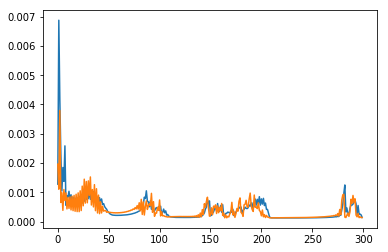

In [6]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [7]:
X_test[0]

array([[ 0.71796906],
       [ 0.72399841],
       [ 0.72407775],
       [ 0.72257041],
       [ 0.72598175],
       [ 0.74327648],
       [ 0.73748512]])

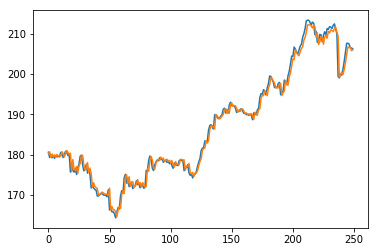

In [8]:
Xt = model.predict(X_test)
plt.plot(scl.inverse_transform(y_test.reshape(-1,1)))
plt.plot(scl.inverse_transform(Xt))

In [9]:
act = []
pred = []
#for i in range(250):
i=249
Xt = model.predict(X_test[i].reshape(1,7,1))
print('predicted:{0}, actual:{1}'.format(scl.inverse_transform(Xt),scl.inverse_transform(y_test[i].reshape(-1,1))))
pred.append(scl.inverse_transform(Xt))
act.append(scl.inverse_transform(y_test[i].reshape(-1,1)))

predicted:[[ 206.00926208]], actual:[[ 206.23]]


In [10]:
result_df = pd.DataFrame({'pred':list(np.reshape(pred, (-1))),'act':list(np.reshape(act, (-1)))})

In [11]:
#result_df.plot(kind='line')

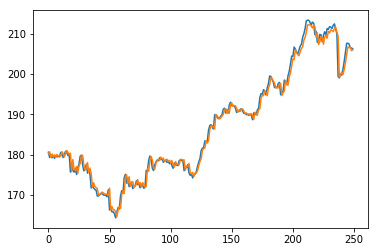

In [12]:
Xt = model.predict(X_test)
plt.plot(scl.inverse_transform(y_test.reshape(-1,1)))
plt.plot(scl.inverse_transform(Xt))


In [13]:
X_test[249]

array([[ 0.9192384 ],
       [ 0.93692979],
       [ 0.95446251],
       [ 0.95470052],
       [ 0.95303451],
       [ 0.94502182],
       [ 0.94541848]])

In [14]:
X_test[248]

array([[ 0.90329234],
       [ 0.9192384 ],
       [ 0.93692979],
       [ 0.95446251],
       [ 0.95470052],
       [ 0.95303451],
       [ 0.94502182]])